## Dataset description:
Dataset UCI Adult: classify people using demographical data - whether they earn more than $50,000 per year or not.

### Feature descriptions:
```python
Age – continuous feature
Workclass – continuous feature
fnlwgt – final weight of object, continuous feature
Education – categorical feature
Education_Num – number of years of education, continuous feature
Martial_Status – categorical feature
Occupation – categorical feature
Relationship – categorical feature
Race – categorical feature
Sex – categorical feature
Capital_Gain – continuous feature
Capital_Loss – continuous feature
Hours_per_week – continuous feature
Country – categorical feature
Target – earnings level, categorical (binary) feature.
```

## Loading Libraries

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import collections
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
from ipywidgets import Image
from io import StringIO
import warnings
warnings.filterwarnings("ignore")
import pydotplus #pip install pydotplus

### Reading Train and Test data

In [28]:
data_train = pd.read_csv('adult_train.csv')

data_train.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [29]:
data_test = pd.read_csv('adult_test.csv')
data_test.tail()

,Age,Workclass,fnlwgt,Education,Education_Num,Martial_Status,Occupation,Relationship,Race,Sex,Capital_Gain,Capital_Loss,Hours_per_week,Country,Target
16277,39,Private,215419.0,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Female,0.0,0.0,36.0,United-States,<=50K.
16278,64,NaN,321403.0,HS-grad,9.0,Widowed,NaN,Other-relative,Black,Male,0.0,0.0,40.0,United-States,<=50K.
16279,38,Private,374983.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
16280,44,Private,83891.0,Bachelors,13.0,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455.0,0.0,40.0,United-States,<=50K.
16281,35,Self-emp-inc,182148.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,60.0,United-States,>50K.


### Remove rows with 'nan' values from test dataset with respect to target variable and encode target variable as `0` and `1` for train and test data.

In [30]:
# necessary to remove rows with incorrect labels in test dataset
data_test = data_test[(data_test['Target'] == ' >50K.') | (data_test['Target']==' <=50K.')]

# encode target variable as integer
data_train.loc[data_train['Target']==' <=50K', 'Target'] = 0
data_train.loc[data_train['Target']==' >50K', 'Target'] = 1

data_test.loc[data_test['Target']==' <=50K.', 'Target'] = 0
data_test.loc[data_test['Target']==' >50K.', 'Target'] = 1

### Find the statistics of the test data and count the distribution of target variable in train data 

In [31]:
data_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,16281,73,35,461,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Workclass,15318,8,Private,11210,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,16281,NaN,NaN,NaN,189436,105715,13492,116736,177831,238384,1.4904e+06
Education,16281,16,HS-grad,5283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Num,16281,NaN,NaN,NaN,10.0729,2.56755,1,9,10,12,16
Martial_Status,16281,7,Married-civ-spouse,7403,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Occupation,15315,14,Prof-specialty,2032,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Relationship,16281,6,Husband,6523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Race,16281,5,White,13946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,16281,2,Male,10860,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
data_train['Target'].value_counts()

0    24720
1     7841
Name: Target, dtype: int64

### Plot the distribution of each feature, so that we have a better understanding about the distribution of each feature. Draw the number of values for each category feature and the histogram of the values for each continuous feature.

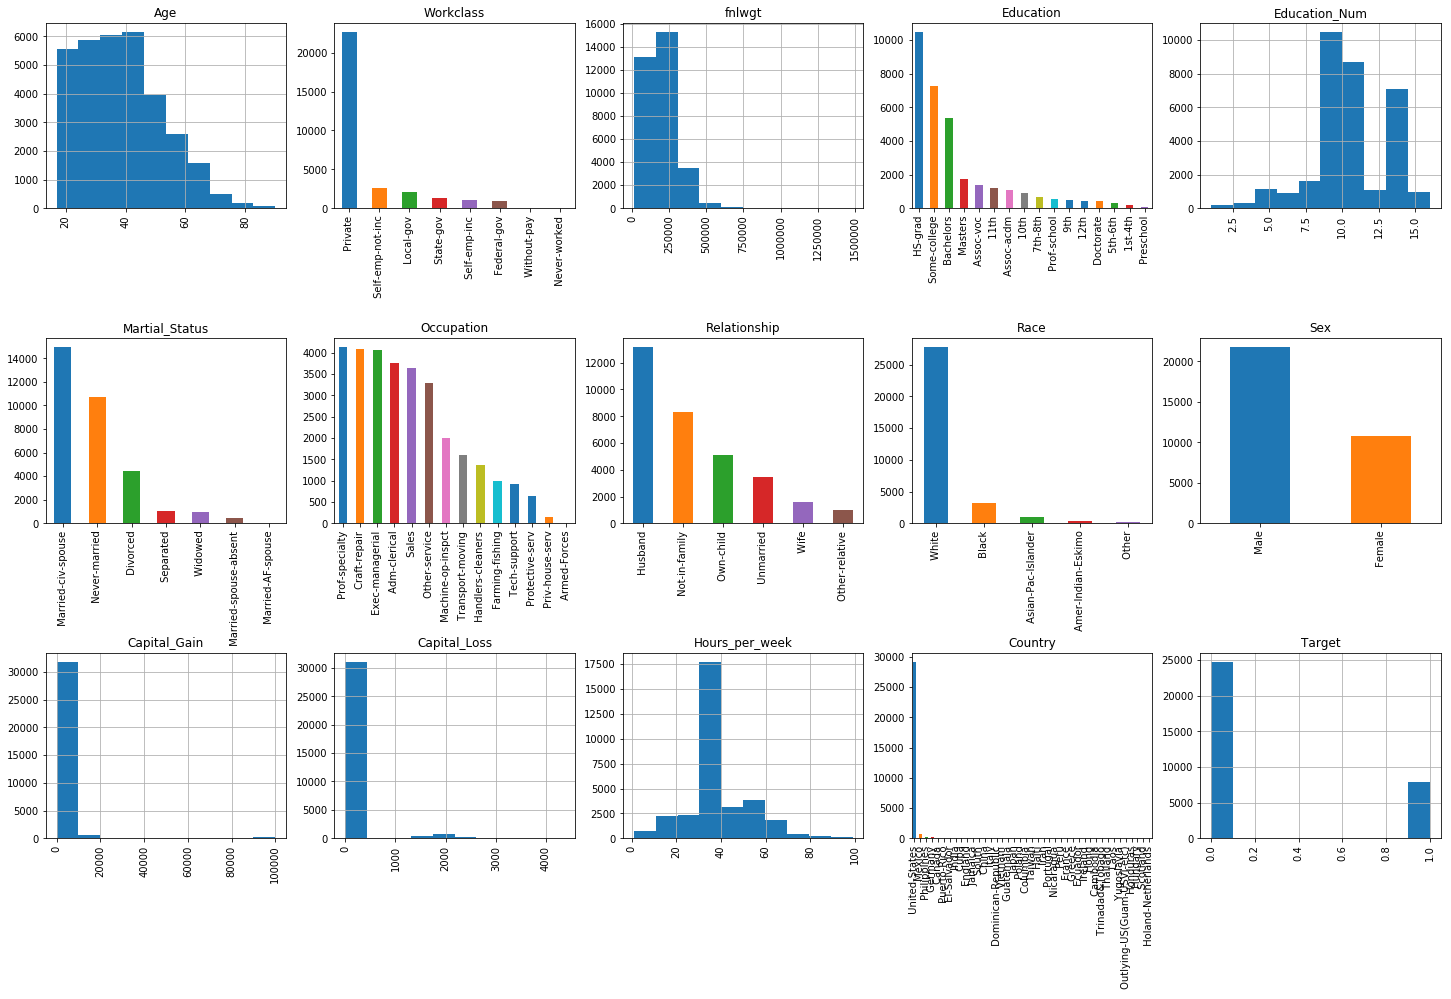

In [33]:
fig = plt.figure(figsize=(25, 15))
cols = 5
rows = np.ceil(float(data_train.shape[1]) / cols)
for i, column in enumerate(data_train.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    if data_train.dtypes[column] == np.object:
        data_train[column].value_counts().plot(kind="bar", axes=ax)
    else:
        data_train[column].hist(axes=ax)
        plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)


As you can see from the plots above our data is mostly concentrated in the USA with mostly male white 
people.This is a good thing to notice, as it may impact the conclusions we come to later.


### Calculate the percentage of adults from each country in the data *

In [34]:
(data_train["Country"].value_counts() / data_train.shape[0]).head()

 United-States    0.895857
 Mexico           0.019748
 Philippines      0.006081
 Germany          0.004207
 Canada           0.003716
Name: Country, dtype: float64

```python
Indeed! 89% of the samples are for people from the US. Mexico comes next with less than 2%.
```

### Check the data types of train and test data *

In [35]:
print(data_train.dtypes)
print(data_test.dtypes)

Age                int64
Workclass         object
fnlwgt             int64
Education         object
Education_Num      int64
Martial_Status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_Gain       int64
Capital_Loss       int64
Hours_per_week     int64
Country           object
Target             int64
dtype: object
Age                object
Workclass          object
fnlwgt            float64
Education          object
Education_Num     float64
Martial_Status     object
Occupation         object
Relationship       object
Race               object
Sex                object
Capital_Gain      float64
Capital_Loss      float64
Hours_per_week    float64
Country            object
Target              int64
dtype: object


```python
As we see, in the test data, age is treated as type object. We need to fix this.
```

### As we have seen in the earlier task, the data type of age in the test data is object type, so we will have to convert the data type of `Age` column in the test data to `int` type. 

In [36]:
data_test['Age'] = data_test['Age'].astype(int)

### Also cast all float features to int type to keep types consistent between our train and test data.

In [37]:
data_test['fnlwgt'] = data_test['fnlwgt'].astype(int)
data_test['Education_Num'] = data_test['Education_Num'].astype(int)
data_test['Capital_Gain'] = data_test['Capital_Gain'].astype(int)
data_test['Capital_Loss'] = data_test['Capital_Loss'].astype(int)
data_test['Hours_per_week'] = data_test['Hours_per_week'].astype(int)

### We have to treat categorical and numerical data in different ways for cleaning the data and encoding, so we will have to store these in two different columns. Choose categorical and continuous features from train data and store in different variables. 

In [38]:
# choose categorical and continuous features from data

categorical_columns = [c for c in data_train.columns 
                       if data_train[c].dtype.name == 'object']
numerical_columns = [c for c in data_train.columns 
                     if data_train[c].dtype.name != 'object']

print('categorical_columns:', categorical_columns)
print('numerical_columns:', numerical_columns)

categorical_columns: ['Workclass', 'Education', 'Martial_Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Country']
numerical_columns: ['Age', 'fnlwgt', 'Education_Num', 'Capital_Gain', 'Capital_Loss', 'Hours_per_week', 'Target']


### As we have already separated the numerical and categorical columns, we will fill in missing data for continuous features with their median values, for categorical features with their mode

In [39]:
# fill missing data

for c in categorical_columns:
    data_train[c].fillna(data_train[c].mode()[0], inplace=True)
    data_test[c].fillna(data_train[c].mode()[0], inplace=True)
    
for c in numerical_columns:
    data_train[c].fillna(data_train[c].median(), inplace=True)
    data_test[c].fillna(data_train[c].median(), inplace=True)

### Machines only understand numbers, so we will have to represent the categorical variables in a way so that the computer understands it, so we will first label encode and then one hot encode the categorical variables. We'll dummy code some categorical features: Workclass, Education, Martial_Status, Occupation, Relationship, Race, Sex, Country. It can be done via pandas method get_dummies

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for x in categorical_columns:
    data_train[x] = le.fit_transform(data_train[x])
    data_test[x] = le.transform(data_test[x])

In [41]:
# Alternate way with a single line of code to encode data with categorical data without complicating if you want to use.

pd.get_dummies(data=data_train, columns = categorical_columns).shape

(32561, 106)

In [41]:
data_train = pd.concat([data_train[numerical_columns],
    pd.get_dummies(data_train[categorical_columns])], axis=1)

data_test = pd.concat([data_test[numerical_columns],
    pd.get_dummies(data_test[categorical_columns])], axis=1)

In [42]:
data_train.shape

(32561, 15)

### Split train and test data into X_train ,y_train,X_test and y_test data

In [47]:
X_train = data_train.drop(['Target'], axis=1)
y_train = data_train['Target']

X_test = data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

### Lets now train our data with Decision tree model. We will then predict our test data and compute the accuracy.

* Train a decision tree (DecisionTreeClassifier) with a maximum depth of 3, and evaluate the accuracy metric on the test data. Use parameter random_state = 17 for results reproducibility.

In [48]:
tree = DecisionTreeClassifier(max_depth=3, random_state=17)
tree.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [49]:
tree_predictions = tree.predict(X_test) 

In [50]:
print("Decision tree accuracy: ",accuracy_score(y_test,tree_predictions))

Decision tree accuracy:  0.839199066396413


### We see that the accuracy we got is 84% without using parameter tuning Now lets see if we can increase our model accuracy by using Decision tree with parameter tuning
* Create a dictionary with Key as `'max_depth'` and value as `range(2,11)` and save it as tree_params.
* Train a decision tree (DecisionTreeClassifier(random_state = 17),tree_params). Find the optimal maximum depth using 5-fold cross-validation (GridSearchCV).

In [51]:
tree_params = {'max_depth': range(2, 11)}

locally_best_tree = GridSearchCV(DecisionTreeClassifier(random_state=17),
                                 tree_params, cv=5)                  

locally_best_tree.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(2, 11)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

### Print out optimal maximum depth(i.e. best_params_ attribute of GridSearchCV) and best_score_  

In [52]:
print("Best params:", locally_best_tree.best_params_)
print("Best cross validaton score", locally_best_tree.best_score_)

Best params: {'max_depth': 8}
Best cross validaton score 0.8547341912103437


### Train a decision tree with maximum depth of 9 (it is the best max_depth in my case), and compute the test set accuracy. Use parameter random_state = 17 for reproducibility.

In [53]:
tuned_tree = DecisionTreeClassifier(max_depth=9, random_state=17)
tuned_tree.fit(X_train, y_train)
tuned_tree_predictions = tuned_tree.predict(X_test)
print("Decision tree Accuracy after tuning: ",accuracy_score(y_test, tuned_tree_predictions))

Decision tree Accuracy after tuning:  0.8540015969535041


### Lets plot the decision tree and see its distibution of classes

* Use the tree.export_graphviz() module to create the graphic visualization object of the learned tree classifier .Input the parameters tuned_tree, out_file=None, feature_names=X_train.columns, filled = True, class_names=['class_no','class_yes'] and save it as dot_data

* Use the pydotplus.graph_from_dot_data() module to draw the graph. Save it as graph

* To display the graph we save the above created image into a file and display it using matplotlib as  Image(graph.create_png())

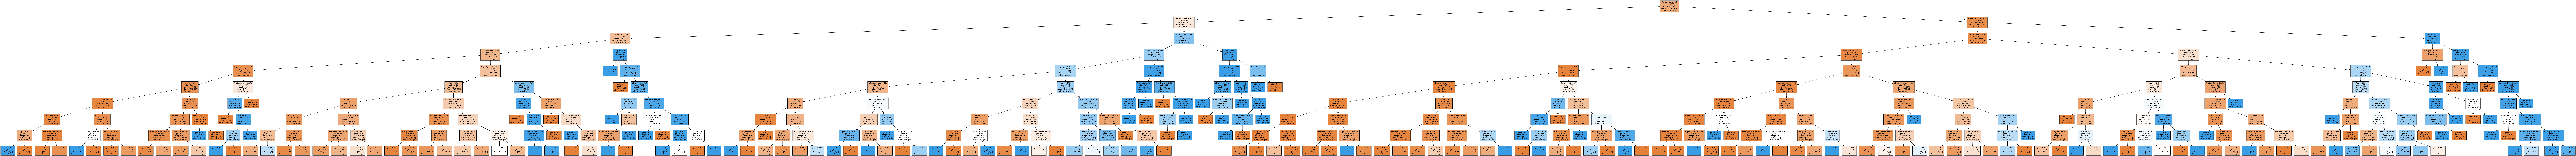

In [54]:
from IPython.display import Image  
from sklearn import tree
import pydotplus

# Create DOT data
dot_data = tree.export_graphviz(tuned_tree, out_file=None, 
                                feature_names=X_train.columns, filled = True,  
                                class_names=['class_yes','class_no'])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())


In [55]:
# Create PNG
graph.write_png("graph.png")

True